In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import find_peaks

In [2]:
colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:brown']

plt.rcParams.update({'font.size': 20})

In [3]:
df = pd.read_csv('data/sequences/9NDR/V0scan_updown_0925_02.csv')
df.R0

0      100
1      100
2      100
3      100
4      100
      ... 
394    100
395    100
396    100
397    100
398    100
Name: R0, Length: 399, dtype: int64

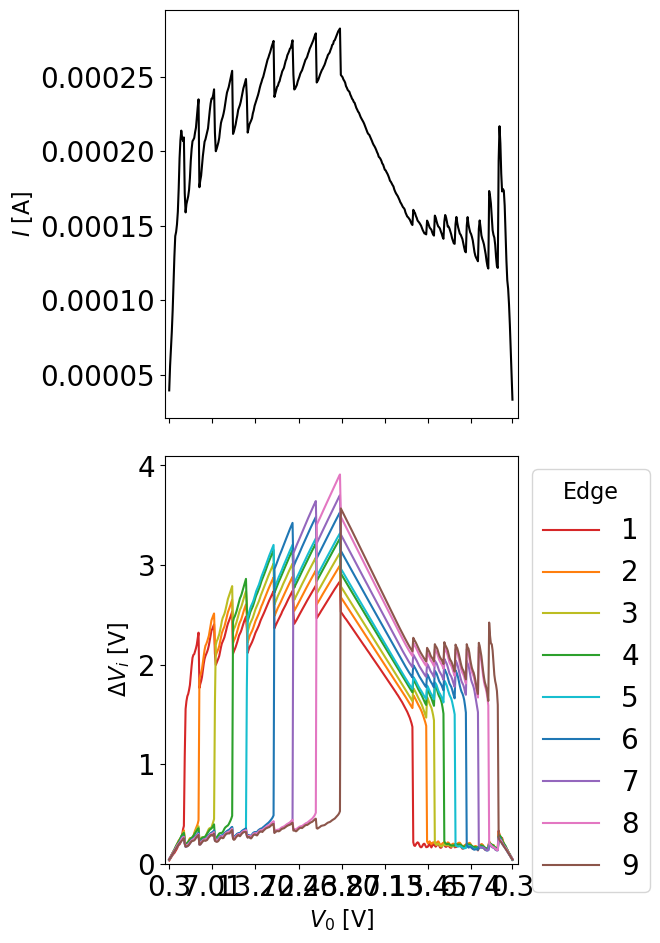

In [4]:
gain = df.V0gain.iloc[0]


fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(7,10))
ax1.plot(df.Vr/df.R0, color='k')
# rect = Rectangle((-5, 1.1), 410, 3, color='green', alpha = 0.2)
# # rect2 = Rectangle((-5, 0), 410, thresh1, color='gray', alpha = 0.2)
# ax2.add_patch(rect)
# ax2.add_patch(rect2)
ax2.set_xlim(-5, 405)
ax2.set_ylim(0, 4.1)
for i in range(9):
    ax2.plot(df['V{}'.format(i+1)], color=colors[i], label='{}'.format(i+1))
    
ticks = np.arange(0, 400, 50)
ticks = np.append(ticks, 398)
ax2.set_xticks(ticks)
ax2.set_xticklabels([round(x*gain,2) for x in df.V0[ticks]])
ax2.set_xlabel(r'$V_0$ [V]', fontsize=16)
ax2.set_ylabel(r'$\Delta V_i$ [V]', fontsize=16)
ax1.set_ylabel(r'$I$ [A]', fontsize=16)
ax2.legend(title='Edge', bbox_to_anchor=(1., 1.0), title_fontsize=16)
# ax2.hlines(1,0, 400, color='gray', alpha=0.5, linestyle='dashed')

fig.tight_layout()

# fig.savefig('figures/9NDR_sweep_data.png')

In [5]:
np.max(df.Vr/df.R0)*np.max(df.V0)*gain

0.00762179959565401

Text(0, 0.5, '$I$ [A]')

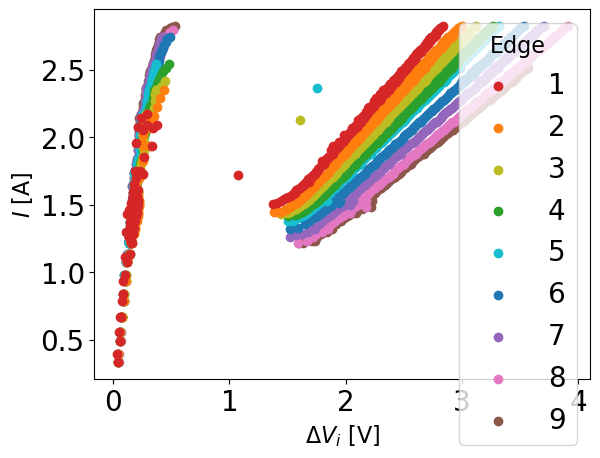

In [6]:
fig, ax = plt.subplots()
for i in range(9):
    ax.scatter(df['V{}'.format(i+1)], df.Vr*df.R0, zorder = -1*i, color = colors[i], label = i+1)

ax.legend(title='Edge', title_fontsize=16)
ax.set_xlabel(r'$\Delta V_i$ [V]', fontsize=16)
ax.set_ylabel(r'$I$ [A]', fontsize=16)
# fig.savefig('figures/9_NDR_sweep_IVcurves.png')

#get individial IV curves

[-0.0010484   0.01219179 -0.05292094  0.09717656 -0.03535002 -0.1051655
  0.10729301 -0.00135705]
[-0.0010059   0.01166046 -0.04996699  0.08763484 -0.01648313 -0.12638186
  0.11742982 -0.00120787]


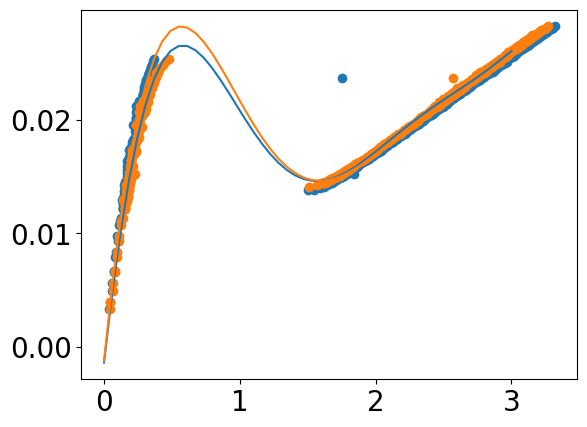

In [7]:
Vs = np.linspace(start=0, stop=3)
# z = 0.025*np.array([.05, -.5, 1.2, 0])
# plt.plot(Vs, np.poly1d(z)(Vs))
# # plt.plot(Vs, Vs**2)
# print(Vs)

plt.scatter(df.V5, df.Vr)
plt.scatter(df.V4, df.Vr)

z = np.polyfit(df.V4, df.Vr, 7)
p = np.poly1d(z)

print(z)
plt.plot(Vs, p(Vs))
z = np.polyfit(df.V5, df.Vr, 7)
p = np.poly1d(z)

print(z)
plt.plot(Vs, p(Vs))

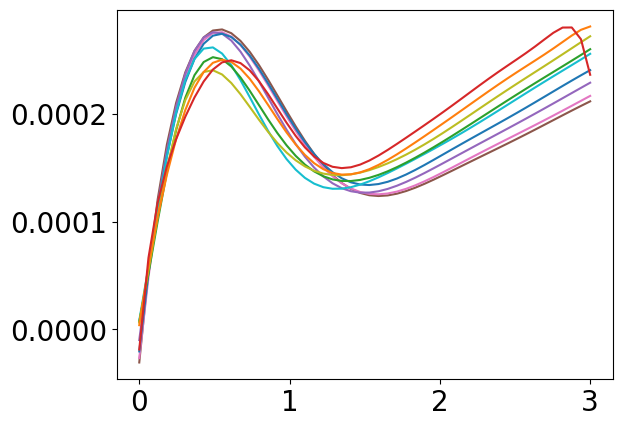

In [8]:
Vs = np.linspace(0, 3)
for i in range(9):
    z = np.polyfit(df['V{}'.format(i+1)], df.Vr/df.R0, 10)
    p = np.poly1d(z)
    
#     plt.scatter(df['V{}'.format(i+1)], df.Vr/df.R0)
    plt.plot(Vs, p(Vs), zorder = -1*i, color = colors[i], label = i+1)
    
    print()
#     plt.show()

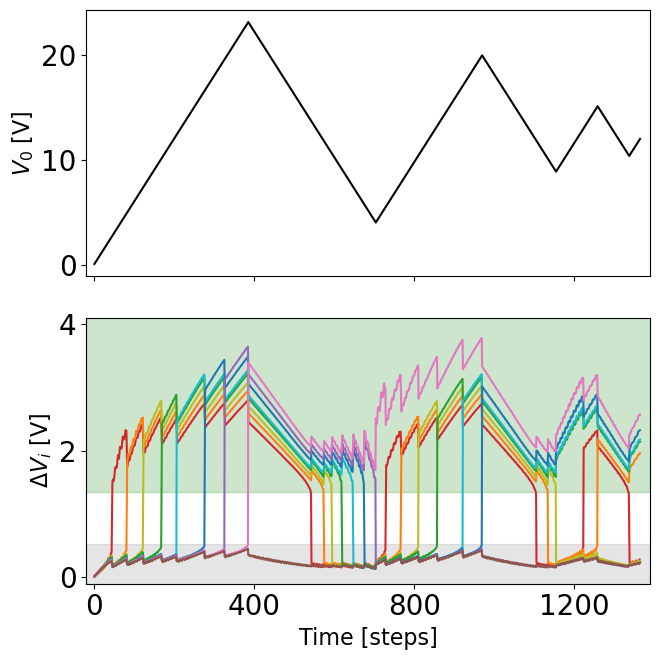

In [32]:
thresh2 = 1.35
thresh1 = 0.52
df = pd.read_csv('data/sequences/9NDR/010111010_0925_02.csv')

gain = df.V0gain.iloc[0]

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(7,7))
# ax1.plot(df.Vr*df.R0, color='k')
ax1.plot(df.V0*gain, color='k')

rect1 = Rectangle((-20, thresh2), 1410, 3, color='green', alpha = 0.2)
rect2 = Rectangle((-20, -0.1), 1410, thresh1+0.1, color='gray', alpha = 0.2)
ax2.add_patch(rect1)
ax2.add_patch(rect2)

# ax2.hlines(0.52, 0, 1410)
ax2.set_xlim(-20, 1390)
ax2.set_ylim(-.1, 4.1)
for i in range(9):
    ax2.plot(df['V{}'.format(i+1)], color=colors[i], label='{}'.format(i+1))

ticks = np.arange(0, 1400, 400)
# ticks = np.append(ticks, len(df)-1)
ax2.set_xticks(ticks)
# ax2.set_xticklabels([round(x*gain,2) for x in df.V0[ticks]])
ax2.set_xlabel('Time [steps]', fontsize=16)
ax2.set_ylabel(r'$\Delta V_i$ [V]', fontsize=16)
ax1.set_ylabel(r'$V_0$ [V]', fontsize=16)
# ax2.legend(title='Edge', bbox_to_anchor=(1., 1.0), title_fontsize=16)
# ax1.hlines(12, 0, len(df))
# ax2.hlines(1,0, len(df)+1, color='gray', alpha=0.5, linestyle='dashed')

fig.tight_layout()
fig.savefig('figures/010111010_dataplot0925.png')

3.998870849609375
0.18646240234375


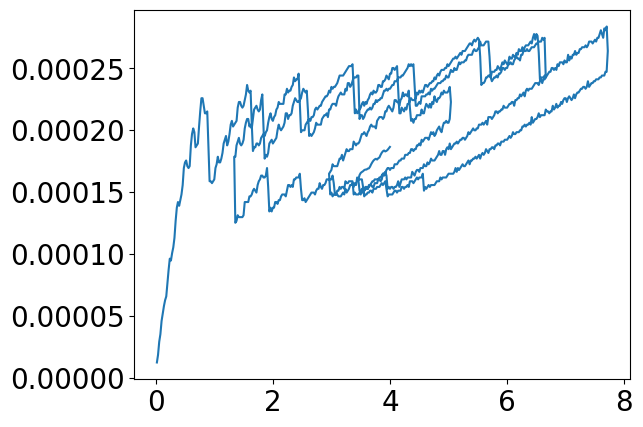

In [33]:
plt.plot(df.V0, df.Vr/df.R0)

print(np.array(df.V0)[-1])
print(np.array(df.Vr)[-1]/np.array(df.R0)[-1]*1e3)

I1 = np.array(df.Vr/ df.R0)*1e3

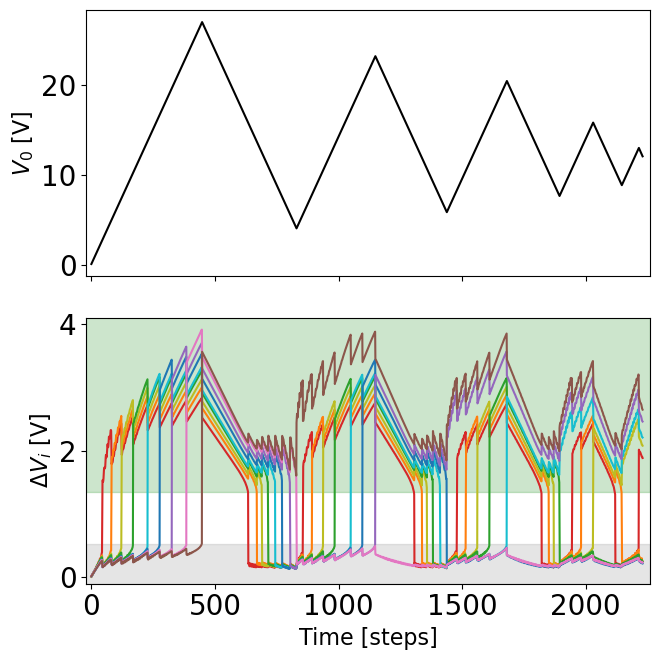

In [34]:
df = pd.read_csv('data/sequences/9NDR/101010101_0925_02.csv')

gain = df.V0gain.iloc[0]

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(7,7))
# ax1.plot(df.Vr*df.R0, color='k')
ax1.plot(df.V0*gain, color='k')

rect1 = Rectangle((-20, thresh2), 2280, 3, color='green', alpha = 0.2)
rect2 = Rectangle((-20, -0.1), 2280, thresh1+0.1, color='gray', alpha = 0.2)
ax2.add_patch(rect1)
ax2.add_patch(rect2)
ax2.set_xlim(-20, 2260)
ax2.set_ylim(-.1, 4.1)

for i in range(9):
    ax2.plot(df['V{}'.format(i+1)], color=colors[i], label='{}'.format(i+1))

# ticks = np.arange(0, len(df), len(df)/5)
# ticks = np.append(ticks, len(df)-1)
# ax2.set_xticks(ticks)
# ax2.set_xticklabels([round(x*gain,2) for x in df.V0[ticks]])
ax2.set_xlabel('Time [steps]', fontsize=16)
ax2.set_ylabel(r'$\Delta V_i$ [V]', fontsize=16)
ax1.set_ylabel(r'$V_0$ [V]', fontsize=16)
# ax2.legend(title='Edge', bbox_to_anchor=(1., 1.0), title_fontsize=16)
# ax2.hlines(1,0, len(df)+1, color='gray', alpha=0.5, linestyle='dashed')

fig.tight_layout()
fig.savefig('figures/101010101_dataplot_0925.png')

4.008941650390625
0.188751220703125


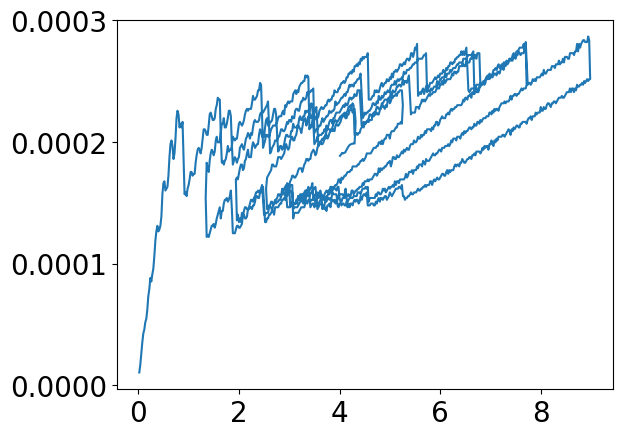

In [35]:
plt.plot(df.V0, df.Vr/df.R0)

print(np.array(df.V0)[-1])
print(np.array(df.Vr)[-1]/np.array(df.R0)[-1]*1e3)

I2 = np.array(df.Vr/df.R0)*1e3

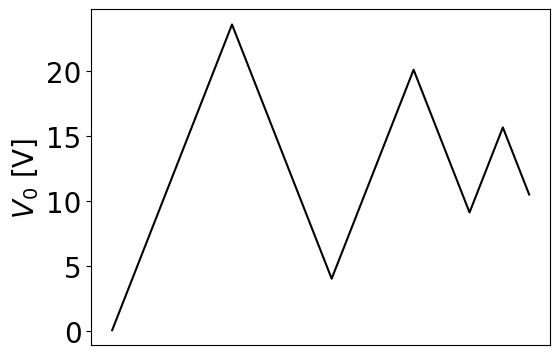

In [95]:
df = pd.read_csv('data/sequences/9NDR/010111010.csv')

gain = df.V0gain.iloc[0]

fig, ax = plt.subplots(figsize=(6,4))
# ax1.plot(df.Vr*df.R0, color='k')
ax.plot(df.V0*gain, color='k')
ax.set_xticks([])
ax.set_ylabel(r'$V_0$ [V]', fontsize=20)
fig.tight_layout()
fig.savefig('figures/010111010_Vonly.png')

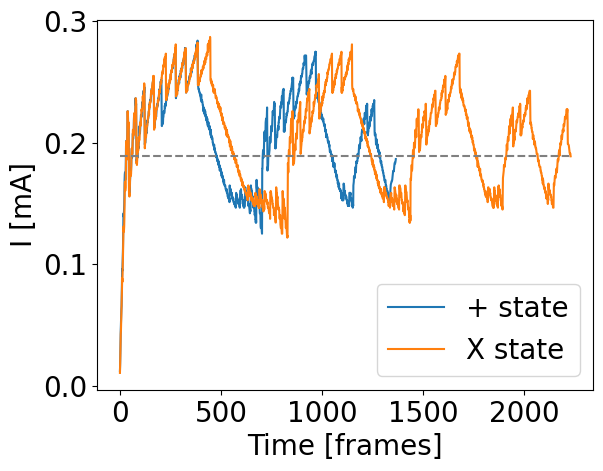

In [39]:
fig, ax = plt.subplots()

ax.plot(I1, label='+ state')
ax.plot(I2, label='X state')
ax.hlines(I2[-1], 0, len(I2), color='gray', linestyle='dashed')

ax.set_xlabel('Time [frames]')
ax.set_ylabel('I [mA]')
ax.legend()

fig.savefig('figures/9NDR_memory_current.png')

In [40]:
print(I2[-1])

0.188751220703125


/Users/laltman2/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


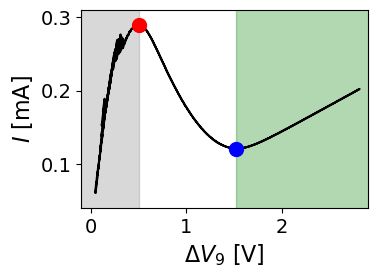

In [16]:
# df = pd.read_csv('data/sequences/9NDR/IVcurves/IVcurve_1.csv')

# plt.plot(df.V0 - df.Vr, df.Vr/df.R0)

# df = pd.read_csv('data/sequences/9NDR/IVcurves/IVcurve_5.csv')

# plt.plot(df.V0 - df.Vr, df.Vr/df.R0)

df = pd.read_csv('data/sequences/9NDR/IVcurves/IVcurve_9.csv')

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(df.V9, df.Vr/df.R0*1e3, c='k')
ax.set_xlim(-0.1, 2.9)
ax.set_ylim(0.04, 0.31)
peak1 = df[df.Vr == np.max(df.Vr)]
ax.scatter(peak1.V9, peak1.Vr/peak1.R0*1e3, zorder=3, s=100, c='r')
thresh1 = peak1.V9.values
rect1 = Rectangle((-0.1, 0), thresh1+0.1, 3, color='gray', alpha=0.3)
ax.add_patch(rect1)

df2 = df[df.V0 - df.Vr > 0.7]
peak2 = df2[df2.Vr == np.min(df2.Vr)]
ax.scatter(peak2.V9, peak2.Vr/peak2.R0*1e3, zorder=3, s=100, c='b')
thresh2 = peak2.V9.values
rect2 = Rectangle((thresh2, 0), 3, 3, color='green', alpha=0.3)
ax.add_patch(rect2)

ax.set_xlabel(r'$\Delta V_9$ [V]', fontsize=16)
ax.set_ylabel(r'$I$ [mA]', fontsize=16)
# ax.annotate()
fig.tight_layout()

fig.savefig('figures/9NDR_IVcurve9.png')

In [74]:
thresh2

array([1.52154541])

In [9]:
df2 = pd.read_csv('data/sequences/9NDR/V0scan_updown_weird.csv')

In [10]:
plt.scatter(df2.V3, df2.Vr*df.R0, zorder = -1*i, color = colors[i], label = 3)

# plt.legend()

NameError: name 'i' is not defined

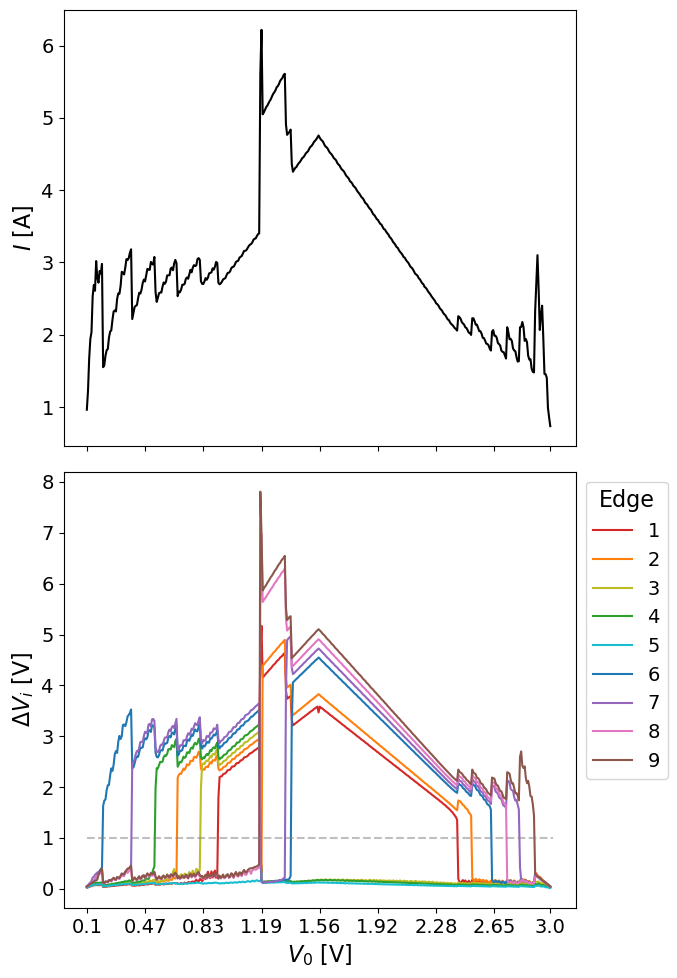

In [11]:
gain = df.V0gain.iloc[0]

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(7,10))
ax1.plot(df2.Vr*df2.R0, color='k')
for i in range(9):
    ax2.plot(df2['V{}'.format(i+1)], color=colors[i], label='{}'.format(i+1))
    
ticks = np.arange(0, 400, 50)
ticks = np.append(ticks, 398)
ax2.set_xticks(ticks)
ax2.set_xticklabels([round(x*gain,2) for x in df.V0[ticks]])
ax2.set_xlabel(r'$V_0$ [V]', fontsize=16)
ax2.set_ylabel(r'$\Delta V_i$ [V]', fontsize=16)
ax1.set_ylabel(r'$I$ [A]', fontsize=16)
ax2.legend(title='Edge', bbox_to_anchor=(1., 1.0), title_fontsize=16)
ax2.hlines(1,0, 400, color='gray', alpha=0.5, linestyle='dashed')

fig.tight_layout()

# fig.savefig('figures/9NDR_sweep_data.png')

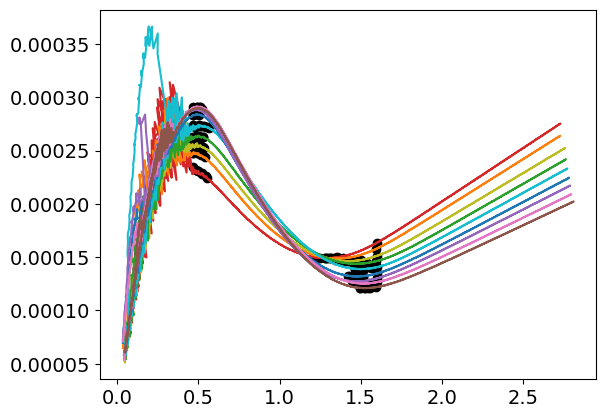

In [72]:
file = 'data/sequences/9NDR/IVcurves/IVcurve_{}.csv'

fig, ax1 = plt.subplots()
# fig, (ax2, ax25) = plt.subplots(2,1, figsize=(5,8), sharex=True)
for i in range(1,10):
    df = pd.read_csv(file.format(i))
    V = df['V{}'.format(i)]
    I = df.Vr/df.R0
    ax1.plot(V, I, label='i', color=colors[i-1])
    
#     plt.vlines(0.45, 0, 3e-4)
#     plt.vlines(1.6, 0, 3e-4)
    
    df2 = df[df['V{}'.format(i)] < 1.6]
    df2 = df2[df2['V{}'.format(i)] > 0.45]
    peaks, _ = find_peaks(df2.Vr)
    V2 = np.array(df2['V{}'.format(i)])
    I2 = np.array(df2.Vr/df2.R0)
    pmax = peaks[np.argmax(I2[peaks])]
    pmin = peaks[np.argmin(I2[peaks])]
    
    ax1.scatter(V2[peaks], I2[peaks], c='k')
#     ax1.scatter(V2[pmax], I2[pmax], c='k')
#     ax1.scatter(V2[pmin], I2[pmin], c='k')
# #     ax2.scatter(i, I2[pmax]*1e3, c='r')
#     ax25.scatter(i, I2[pmin]*1e3, c='b')

# ax2.set_xticks(np.arange(1,10))
# ax25.set_xlabel(r'Edge $i$', fontsize=20)
# ax2.set_ylabel(r'$I_{max}$ [mA]', fontsize=20)
# ax25.set_ylabel(r'$I_{min}$ [mA]', fontsize=20)
# fig.tight_layout()
# fig.savefig('figures/9NDR_Imaxmin.png')
    #ax3.scatter(i, df['RL{}'.format(i)].iloc[0])
#     plt.show()